In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
import numpy as np

In [87]:
path_out = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/G_filtered_df_TCGA-BH-A18V-01A-11R-A12D-07_samp_chrt_norm_mot_unip.tsv'

In [109]:
with open(path_out, 'r') as fp: 
    file_13 = []
    file_14 = []
    file_12 = []

    for line in fp.readlines():
        line = line.split('\n')[0]
        if 'sample' in line:
            columns = line.split('\t')
        elif len(line.split('\t')) == 14:
            file_14.append(line.split('\t'))
        elif len(line.split('\t')) == 13:
            file_13.append(line.split('\t'))
        elif len(line.split('\t')) == 12:
            file_12.append(line.split('\t'))
file_12 = pd.DataFrame(file_12)
file_13 = pd.DataFrame(file_13)
file_14 = pd.DataFrame(file_14)


# 1 Correct the missing columns 
mycols_12 = [name for name in columns if name != 'Init_cancer']
mycols_13 = columns 
mycols_14 = columns + ['duplicate']

if file_12.shape[0] > 0 : 
    file_12.columns = mycols_12
if file_13.shape[0] > 0 : 
    file_13.columns = mycols_13
if file_14.shape[0] > 0 : 
    file_14.columns = mycols_14

In [110]:
df = file_13

In [111]:
df = df.loc[df['normal_cohort_id']=='matchedNormals']

In [112]:
#df = pd.read_csv(path_out, sep = ',')

In [113]:
df.head()


,sample,mutation_mode,min_sample_reads,#_of_cohort_samples,reads_per_cohort_sample,#_normal_samples_allowed,normal_cohort_id,reads_per_normal_sample,Init_cancer,Filter_Sample,Filter_Sample_Cohort,Filter_Sample_Cohort_CohortNormal,Filter_Sample_Cohort_CohortNormal_Uniprot
166,TCGA-BH-A18V-01A-11R-A12D-07.all,ref,2.0,1,1.0,2,matchedNormals,0.0,1816184,1609575,1609229,23983,23955
167,TCGA-BH-A18V-01A-11R-A12D-07.all,ref,2.0,1,1.0,2,matchedNormals,3.0,1816184,1609575,1609229,34278,34241
168,TCGA-BH-A18V-01A-11R-A12D-07.all,ref,2.0,1,1.0,1,matchedNormals,10.0,1816184,1609575,1609229,62377,62295
169,TCGA-BH-A18V-01A-11R-A12D-07.all,ref,2.0,1,1.0,1,matchedNormals,3.0,1816184,1609575,1609229,28576,28543
170,TCGA-BH-A18V-01A-11R-A12D-07.all,ref,2.0,1,1.0,1,matchedNormals,0.0,1816184,1609575,1609229,23983,23955


In [114]:
param = ['min_sample_reads', '#_of_cohort_samples', 'reads_per_cohort_sample', '#_normal_samples_allowed', 'reads_per_normal_sample', 'normal_cohort_id']
kmers = 'Filter_Sample_Cohort_CohortNormal_Uniprot'
palettes = ["light:b_r", 'dark:seagreen_r', 'dark:purple_r', 'dark:magenta_r', 'light:orange_r', 'dark:green_r']
df = df.astype({kmers: 'float'})

Filter_Sample_Cohort_CohortNormal_Uniprot
Filter_Sample_Cohort_CohortNormal_Uniprot
Filter_Sample_Cohort_CohortNormal_Uniprot
Filter_Sample_Cohort_CohortNormal_Uniprot
Filter_Sample_Cohort_CohortNormal_Uniprot
Filter_Sample_Cohort_CohortNormal_Uniprot


KeyError: 0

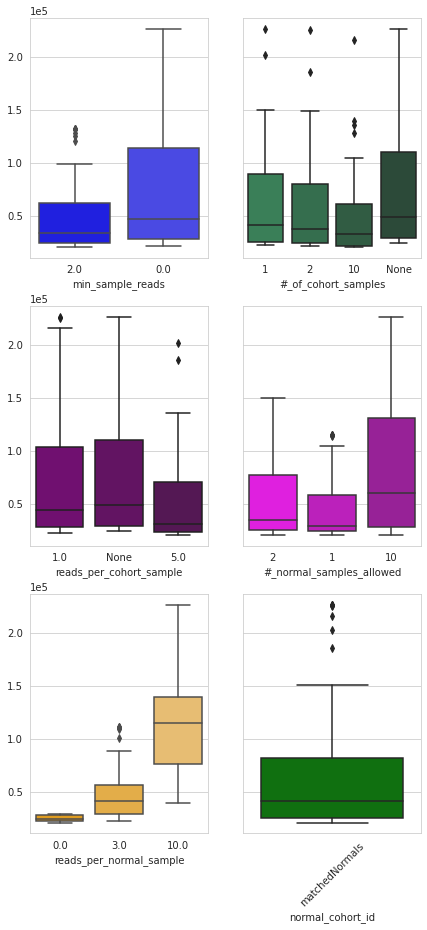

In [115]:
fig, axes = plt.subplots(3, 2, figsize=(7,15), sharey=True)
plot_pos = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]
for plot_id in np.arange(len(param)):
    #plt.figure(figsize = (2, 4))
    sns.set_style("whitegrid")
    mypalette = sns.color_palette(palettes[plot_id])
    print(kmers)
    sns.boxplot(ax=axes[plot_pos[plot_id]], x=param[plot_id], y=kmers, 
                data=df, palette = mypalette).set(ylabel=None) 
    plt.ticklabel_format(style='scientific', axis='y',scilimits=(0,0), useMathText=False, useLocale=True)
    if 'id' in param[plot_id]:
        plt.xticks(rotation=45)
#fig.supylabel('Final filtered junction (#)')
fig.suptitle(df.loc[0, 'sample'] , fontsize = 12)
fig.text(0.04, 0.5, 'Final filtered kmers (#)', va='center', rotation='vertical')
#plt.savefig('/cluster/work/grlab/projects/projects2020_OHSU/plots/v2_v2.5f0752a_conf2_BRCA_TCGA-AO-A0JM-01A-21R-A056-07.all.png', bbox_inches='tight', dpi = 300)
plt.show()
    

In [ ]:
df['Filter_Sample_Cohort_CohortNormal_Uniprot'].as_t

In [47]:
sns.boxplot(ax=axes[plot_pos[plot_id]], x=param[plot_id], y='Filter_Sample_Cohort_CohortNormal_Uniprot', 
                data=df, palette = mypalette).set(ylabel=None) 

TypeError: Neither the `x` nor `y` variable appears to be numeric.

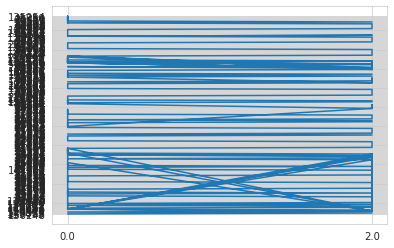

In [46]:
plt.plot(df[param[plot_id]], df['Filter_Sample_Cohort_CohortNormal_Uniprot'] )

In [50]:
df['Filter_Sample_Cohort_CohortNormal_Uniprot'].d

0      150248
1      119495
2      149953
3      119895
4      118472
        ...  
323     70611
324     21961
325     25480
326     43750
327    135954
Name: Filter_Sample_Cohort_CohortNormal_Uniprot, Length: 328, dtype: object

In [51]:
df.dtypes

sample                                       object
mutation_mode                                object
min_sample_reads                             object
#_of_cohort_samples                          object
reads_per_cohort_sample                      object
#_normal_samples_allowed                     object
normal_cohort_id                             object
reads_per_normal_sample                      object
Init_cancer                                  object
Filter_Sample                                object
Filter_Sample_Cohort                         object
Filter_Sample_Cohort_CohortNormal            object
Filter_Sample_Cohort_CohortNormal_Uniprot    object
dtype: object

In [53]:
df.convert_dtypes()

TypeError: 'Series' object is not callable

In [58]:
df = df.astype({'Filter_Sample_Cohort_CohortNormal_Uniprot': 'float'})

In [56]:
df.dtypes

sample                                       object
mutation_mode                                object
min_sample_reads                             object
#_of_cohort_samples                          object
reads_per_cohort_sample                      object
#_normal_samples_allowed                     object
normal_cohort_id                             object
reads_per_normal_sample                      object
Init_cancer                                  object
Filter_Sample                                object
Filter_Sample_Cohort                         object
Filter_Sample_Cohort_CohortNormal            object
Filter_Sample_Cohort_CohortNormal_Uniprot    object
dtype: object

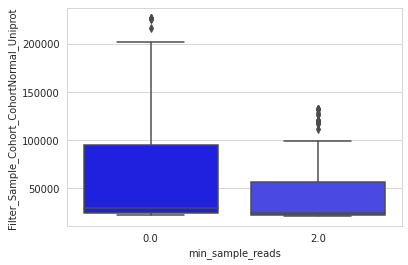

In [65]:
sns.boxplot( x=param[plot_id], y='Filter_Sample_Cohort_CohortNormal_Uniprot', 
                data=df, palette = mypalette)
plt.show()